# covid19world
This notebook shows how to get the most recent covid-19 data from the John Hopkins repository 
and use it to make interesting visualizations.

First we start by importing some standard libraries and then we import the covid19world.py package
which defines the get_world_covid_data() function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from covid19world import *

``` get_world_covid_data ``` returns a pair data of objects.
The first data[0] is an object whose fields are the names of the countries of the world
and whose value is a list of the covid stats for that country for all dates from 1/22/2020 to today.

The second data[1] is a list of the covid stats for the world

In [3]:
data = get_world_covid_data()
len(data)
print("\n*** first ten US covid stats")
print(data[0]['US'][:10])
print("\n*** first ten World covid stats")
print(data[1][:10])
print("\n*** first ten countries of the world")
print(list(data[0])[:10])



*** first ten US covid stats
[{'date': '2020-1-22', 'confirmed': 1, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-23', 'confirmed': 1, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-24', 'confirmed': 2, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-25', 'confirmed': 2, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-26', 'confirmed': 5, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-27', 'confirmed': 5, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-28', 'confirmed': 5, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-29', 'confirmed': 5, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-30', 'confirmed': 5, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-31', 'confirmed': 7, 'deaths': 0, 'recovered': 0}]

*** first ten World covid stats
[{'date': '2020-1-22', 'deaths': 17, 'confirmed': 555, 'recovered': 28}, {'date': '2020-1-23', 'deaths': 18, 'confirmed': 654, 'recovered': 30}, {'date': '2020-1-24', 'deaths': 26, 'confirmed': 941, 'recovered': 36}, {'date': '2020-1-25', 'deaths': 42, 'co

## World Covid Stats
Here we plot the world covid stats directly

We can plot this data directly and the x axis will be the number of days since the 1/22/2020

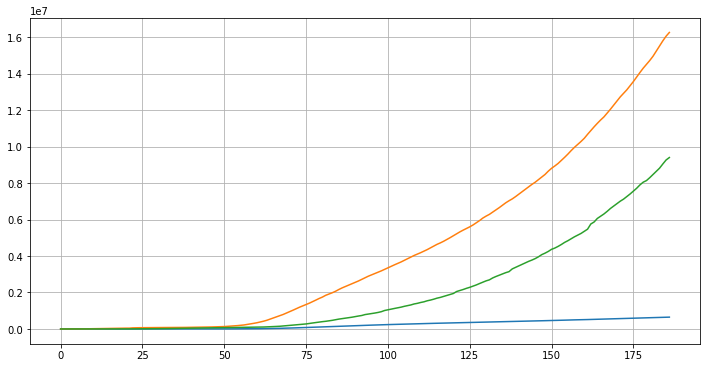

In [4]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot([d['deaths'] for d in data[1]])
plt.plot([d['confirmed'] for d in data[1]])
plt.plot([d['recovered'] for d in data[1]])
plt.grid()

## Log plots of world covid statistics
Here we plot the deaths, cases, and recovered cases in a log plot

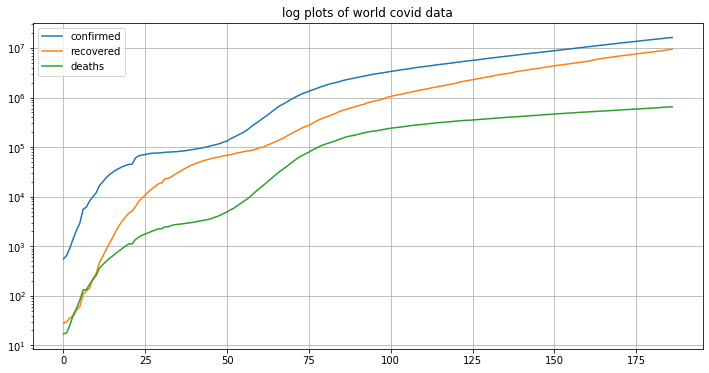

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]

plt.plot([d['confirmed'] for d in data[1]])
plt.plot([d['recovered'] for d in data[1]])
plt.plot([d['deaths'] for d in data[1]])
plt.title('log plots of world covid data')
plt.legend(["confirmed","recovered","deaths"])
plt.yscale('log')
plt.grid()

Here we plot an approximation of the Case Fatality Rate, which is the ratio of deaths to confirmed cases
for any particular country (in this case the US)

Note also that we set the xticks to approximate the months and we have to add 21 zeroes to the beginning
of the data

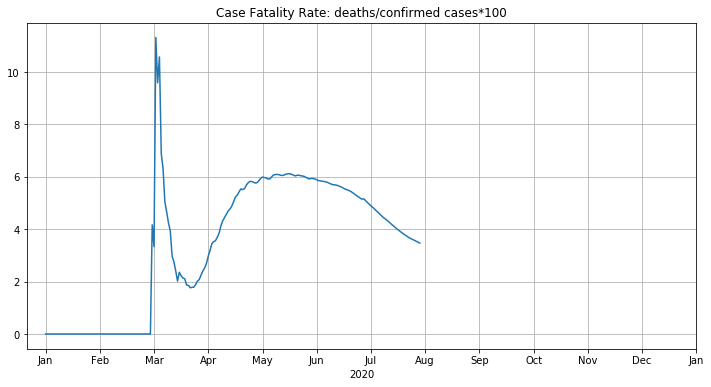

In [6]:
country='US'
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot([0]*21+[d['deaths']/max(1,d['confirmed'])*100 for d in data[0][country]])
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan'.split(' '))
plt.xlabel("2020")
plt.title("Case Fatality Rate: deaths/confirmed cases*100")
plt.grid()

## Comparing the covid deaths in major economies
Next we give an example of plotting several graphs with a loop.
This calculates the perCapita death rates of several countries suing the getCountryPop function
defined in the covid19world module

We also plot the data on the 2020 scale with months approximately indicated. We need to add 21 zeroes to the data since the data starts on 1/22/2020

Text(0.5, 1.0, 'covid19 deaths per 10K')

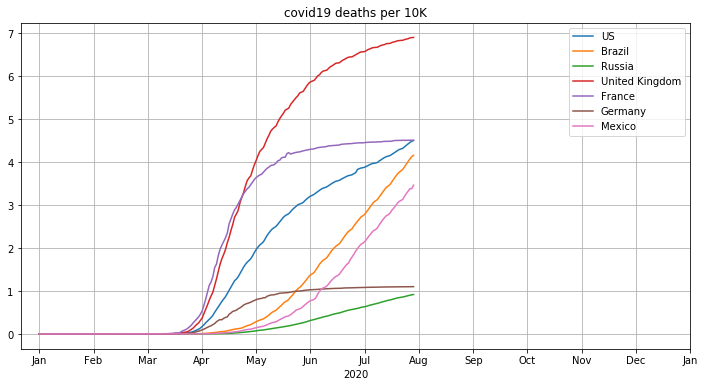

In [7]:
plt.rcParams['figure.figsize'] = [12, 6]
allCountries = list(data[0])
for country in ['US','Brazil','Russia','United Kingdom','France','Germany','Mexico']:
    plt.plot([0]*21+[d['deaths']/getCountryPop(country)*10000 for d in data[0][country]],label=country)
#plt.plot([0]*90+[i*72/360 for i in range(1,120)],label="usual US deaths")
plt.legend()
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan'.split(' '))
plt.xlabel("2020")
plt.grid()
plt.title("covid19 deaths per 10K")
#plt.caption("the normal total US death rate is 6 per 10000/mo")

Here we sort the countries by cases per Capita and print out the five countries with the highest number of cases

In [11]:
covidProperty = 'deaths'  # or 'deaths' or 'confirmed'
for country in list(data[0])[:5]:
    print(data[0][country][-1])
countriesByCasesPerCapita = [(country, data[0][country][-1][covidProperty]/getCountryPop(country)*10000) for country in list(data[0])]
countriesByCasesPerCapita = sorted(countriesByCasesPerCapita,key=lambda x: x[1],reverse=True)
countriesByCasesPerCapita
'done'

{'date': '2020-7-26', 'confirmed': 36157, 'deaths': 1259, 'recovered': 25180}
{'date': '2020-7-26', 'confirmed': 4763, 'deaths': 138, 'recovered': 2682}
{'date': '2020-7-26', 'confirmed': 27357, 'deaths': 1155, 'recovered': 18088}
{'date': '2020-7-26', 'confirmed': 897, 'deaths': 52, 'recovered': 803}
{'date': '2020-7-26', 'confirmed': 932, 'deaths': 40, 'recovered': 242}
country with no population  Diamond Princess
country with no population  Serbia
country with no population  Taiwan*
country with no population  West Bank and Gaza
country with no population  Kosovo
country with no population  MS Zaandam


'done'

Here we plot the per capita covid19 cases in the top 20 countries with the highest GDP

'done'

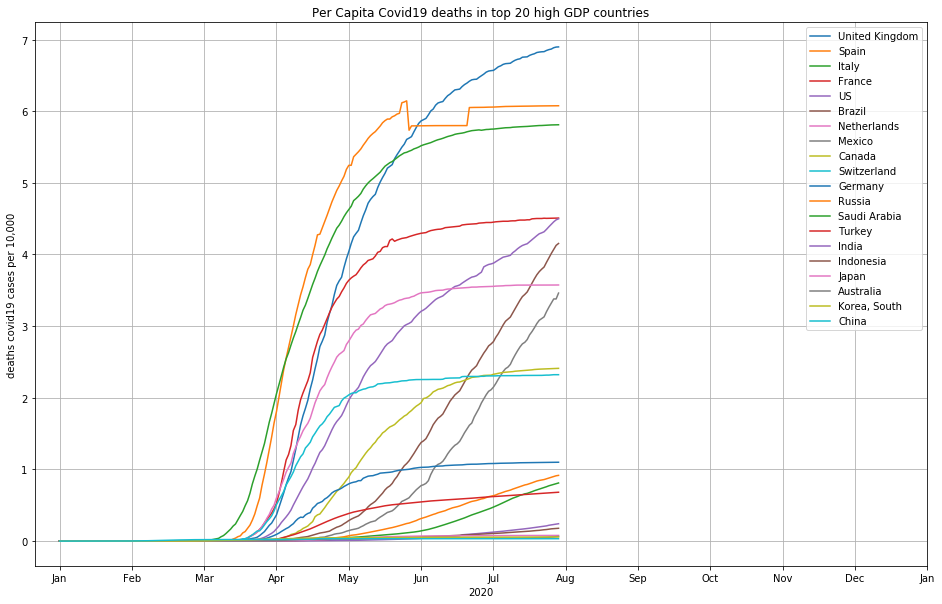

In [12]:
plt.rcParams['figure.figsize'] = [16, 10]
fig, ax = plt.subplots()
topCountries = [d[0] for d in countriesByCasesPerCapita]
topGDP = ['US','China','Japan','Germany','India',
          'United Kingdom','France','Italy','Brazil','Canada',
          'Russia','Korea, South','Spain','Australia','Mexico',
          'Indonesia','Netherlands','Saudi Arabia','Turkey','Switzerland']
topGDPsorted = [d[0] for d in countriesByCasesPerCapita if d[0] in topGDP]
for country in topGDPsorted[0:20]:
    plt.plot(([0]*21)+[d[covidProperty]/getCountryPop(country)*10000 for d in data[0][country]],label=country)
plt.legend()
plt.grid()
plt.title("Per Capita Covid19 "+covidProperty+" in top 20 high GDP countries")
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan'.split(' '))
plt.xlabel("2020")
plt.ylabel(covidProperty+" covid19 cases per 10,000")
fig.savefig("plots/plot_"+covidProperty+"_top20GDP.png")
'done'

This is a plot of the per Capita covid-19 status of countries ranked by their status.
We can use this to see how close to the top a country is based on its covid19 status.

For a country with 50/10000 cases there are 30 countries with worse infection ratios.

Text(0, 0.5, 'confirmed cases per 10,000')

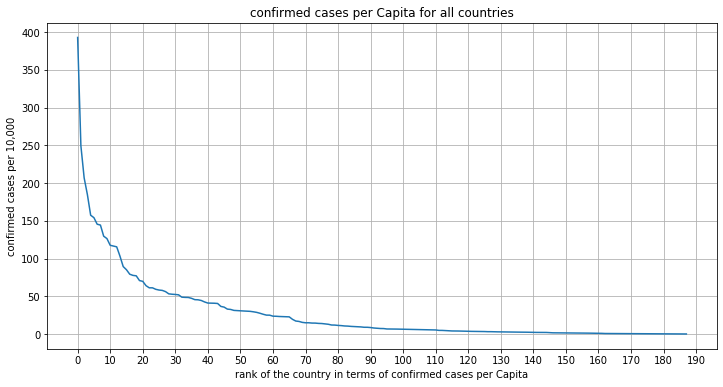

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]
topCountries = [d[0] for d in countriesByCasesPerCapita]
plt.plot([d[1] for d in countriesByCasesPerCapita])
plt.xticks(np.arange(0,200,step=10))
plt.grid()
plt.title("confirmed cases per Capita for all countries")
plt.xlabel("rank of the country in terms of confirmed cases per Capita")
plt.ylabel("confirmed cases per 10,000")